In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/home/shavak_new/victor/mp2'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
print("Hello Major Project SWIN!")

Hello Major Project SWIN!


In [ ]:
# !pip install rasterio
# !pip install configilm
# !pip install lightning
# !pip install lmdb

In [ ]:
# Standard lib
import os
import io
import json
import math
import shutil
from collections import defaultdict
from tqdm import tqdm
import warnings

import time
import json
from datetime import datetime

# Data / I/O
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from rasterio.enums import Resampling
import zstandard as zstd
import tarfile

# PyTorch & helpers
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torchvision.transforms as T

# ML libs
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, average_precision_score, f1_score, accuracy_score,precision_recall_curve
import numpy as np

# Model libs
import timm
from reben_publication.BigEarthNetv2_0_ImageClassifier import BigEarthNetv2_0_ImageClassifier

/home/shavak_new/anaconda3/envs/py311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
HOME_DIR = os.getcwd()
print(HOME_DIR)
label_names = ['Agro-forestry areas', 'Arable land', 'Beaches, dunes, sands', 'Broad-leaved forest', 'Coastal wetlands', 'Complex cultivation patterns', 'Coniferous forest', 'Industrial or commercial units', 'Inland waters', 'Inland wetlands', 'Land principally occupied by agriculture, with significant areas of natural vegetation', 'Marine waters', 'Mixed forest', 'Moors, heathland and sclerophyllous vegetation', 'Natural grassland and sparsely vegetated areas', 'Pastures', 'Permanent crops', 'Transitional woodland, shrub', 'Urban fabric']

/home/shavak_new/victor/mp2


In [ ]:
# %cd /kaggle/working
# %mkdir reben_publication
# %cd reben_publication
# !wget "https://git.tu-berlin.de/rsim/reben-training-scripts/-/raw/main/reben_publication/BigEarthNetv2_0_ImageClassifier.py"
# %cd /kaggle/working
# !wget "https://zenodo.org/records/10891137/files/metadata.parquet"

In [ ]:
# zst_path = "/home/shavak_new/victor/BigEarthNet-S2.tar.zst"
# output_dir = HOME_DIR+"/temp"

# # Check if folder exists, then remove everything inside
# if os.path.exists(output_dir):
#     shutil.rmtree(output_dir)  # delete the folder and all its contents
#     os.makedirs(output_dir)    # recreate the empty folder
#     print(f"✅ Emptied folder: {output_dir}")
# else:
#     print("⚠️ Folder does not exist.")

# # Bands we want to keep
# selected_bands = ["B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B11", "B12"]

# # Create output folder if not exists
# os.makedirs(output_dir, exist_ok=True)

# with open(zst_path, 'rb') as f:
#     dctx = zstd.ZstdDecompressor()
#     with dctx.stream_reader(f) as stream:
#         with tarfile.open(fileobj=stream, mode='r|*') as tar:
#             count = 0
#             top_folders = set()
#             for member in tar:
#                 if member.isfile() and member.name.endswith('.tif'):
                    
#                     top_folder = "/".join(member.name.split("/")[:2])
#                     top_folders.add(top_folder)
                    
#                     # if len(top_folders) == 2:
#                     #     break
                        
#                     # Check if filename ends with one of the desired bands
#                     if any(member.name.endswith(f"_{b}.tif") for b in selected_bands):
#                         tar.extract(member, path=output_dir)
#                         # count += 1
#                 # if count >= 1000:  # stop early for testing
#                 #     break

# print(f"✅ Extracted files for selected bands into {output_dir}")

In [ ]:
# zst_path = "/kaggle/input/big-earth-net-s2/BigEarthNet-S2.tar.zst"


# with open(zst_path, 'rb') as f:
#     dctx = zstd.ZstdDecompressor()
#     with dctx.stream_reader(f) as stream:
#         with tarfile.open(fileobj=stream, mode='r|*') as tar:
#             top_folders = set()
#             for member in tar:
#                 if member.isfile():
#                     top_folder = "/".join(member.name.split("/")[:2])
#                     top_folders.add(top_folder)
#                     # if len(top_folders) == 1:
#                     #     break
#             print(len(top_folders))
# with open("top_folders.txt", "w") as file:
#     for folder in top_folders:
#         file.write(folder + "\n")

In [ ]:
# path = HOME_DIR+"/temp/BigEarthNet-S2/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57"

# files = sorted(os.listdir(path))  # sorts alphabetically
# for f in files:
#     print(f)


In [ ]:
# with open("top_folders.txt", "r") as file:
#     top_folders = [line.strip() for line in file.readlines()]

# print(len(top_folders))


In [ ]:
def show_true_color(patch_dir, percentile=99):
    """
    Display a true-color (RGB) image from a BigEarthNet-S2 patch folder.

    Args:
        patch_dir (str): Path to the patch folder containing *_B02.tif, *_B03.tif, *_B04.tif
        percentile (float): Percentile for normalization (default=99)
    """
    rgb_bands = ["B04", "B03", "B02"]  # Red, Green, Blue
    imgs = []

    for band in rgb_bands:
        tif_file = [f for f in os.listdir(patch_dir) if f.endswith(f"_{band}.tif")][0]
        path = os.path.join(patch_dir, tif_file)
        
        with rasterio.open(path) as src:
            # print(src.height, src.width)
            arr = src.read(
                out_shape=(1, src.height, src.width),
                resampling=Resampling.bilinear
            )[0].astype(np.float32)
            imgs.append(arr)

    rgb = np.stack(imgs, axis=-1)
    rgb = rgb / np.percentile(rgb, percentile)  # normalize
    rgb = np.clip(rgb, 0, 1)

    plt.figure(figsize=(6, 6))
    plt.imshow(rgb)
    plt.title(f"True-Color RGB: {os.path.basename(patch_dir)}")
    plt.axis("off")
    plt.show()


In [ ]:
# # Base path where all patch folders live
# base_dir = HOME_DIR+"/temp/BigEarthNet-S2"

# # Get all first-level subfolders (patches)
# patch_folders = sorted([
#     os.path.join(base_dir, f)
#     for f in os.listdir(base_dir)
#     if os.path.isdir(os.path.join(base_dir, f))
# ])

# # Display the first 2 patches for demonstration
# for patch_path in patch_folders:
#     # Each patch folder may have subfolders
#     subfolders = [os.path.join(patch_path, sf) 
#                   for sf in os.listdir(patch_path) 
#                   if os.path.isdir(os.path.join(patch_path, sf))]

#     if not subfolders:
#         continue
    
#     # Loop through subfolders
#     for i in range(10):
#         # RGB bands (B04=Red, B03=Green, B02=Blue)
#         show_true_color(subfolders[i])

In [ ]:
# !mv /kaggle/working/reben_publication/metadata.parquet /kaggle/working/metadata.parquet

In [ ]:
pd.set_option('display.max_columns', None)     # show all columns
# pd.set_option('display.max_colwidth', None)    # show full cell content (no truncation)
# pd.set_option('display.width', 0)              # no line wrapping

path = HOME_DIR+"/metadata.parquet"
df = pd.read_parquet(path)
print(len(df.columns.tolist()))
print(df.head())

8
                                            patch_id  \
0  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
1  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
2  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
3  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
4  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   

                                              labels split  country  \
0  [Arable land, Broad-leaved forest, Mixed fores...  test  Austria   
1  [Arable land, Broad-leaved forest, Inland wate...  test  Austria   
2  [Arable land, Broad-leaved forest, Coniferous ...  test  Austria   
3  [Broad-leaved forest, Complex cultivation patt...  test  Austria   
4  [Broad-leaved forest, Complex cultivation patt...  test  Austria   

                                        s1_name  \
0  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57   
1  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55   
2  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56   
3  S1B_IW_GRDH_1SDV_20170612T1

In [ ]:
# # Ensure `labels` is a list
# df["labels"] = df["labels"].apply(lambda x: eval(x) if isinstance(x, str) else x)

# # Encode to a single column of binary lists
# df["encoded"] = df["labels"].apply(
#     lambda lbls: [1 if label in lbls else 0 for label in label_names]
# )

# # Keep only patch_id and encoded column
# encoded_df = df[["patch_id", "encoded"]]

# print(encoded_df.head())

In [ ]:
# # Convert to list of dicts (each row → {"patch_id": ..., "encoded": [...]})
# records = encoded_df.to_dict(orient="records")

# output_path = HOME_DIR+"/bigearthnet_encoded.json"

# # Write to JSON file (pretty formatted)
# with open(output_path, "w", encoding="utf-8") as f:
#     json.dump(records, f, ensure_ascii=False, indent=2)

# print(f"✅ Saved JSON to: {output_path}")

In [ ]:
full_df = pd.read_json(HOME_DIR+"/bigearthnet_encoded.json")
print(full_df.head())

                                            patch_id  \
0  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
1  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
2  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
3  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
4  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   

                                             encoded  
0  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...  
1  [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...  
2  [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, ...  
3  [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, ...  
4  [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...  


In [ ]:
encoded_matrix = np.vstack(full_df["encoded"].values)

# Count how many patches have each label
label_counts = encoded_matrix.sum(axis=0)

# Put into a DataFrame for readability
dist_df = pd.DataFrame({
    "Label": label_names,
    "Count": label_counts,
    "Percentage": (label_counts / len(full_df)) * 100
})

print(dist_df.sort_values("Count", ascending=False))

                                                Label   Count  Percentage
1                                         Arable land  188025   39.168774
12                                       Mixed forest  165780   34.534766
6                                   Coniferous forest  154941   32.276820
17                       Transitional woodland, shrub  141150   29.403922
3                                 Broad-leaved forest  135928   28.316092
10  Land principally occupied by agriculture, with...  122709   25.562351
5                        Complex cultivation patterns   99598   20.747941
15                                           Pastures   95605   19.916132
18                                       Urban fabric   63758   13.281865
8                                       Inland waters   63212   13.168124
11                                      Marine waters   61832   12.880647
0                                 Agro-forestry areas   33181    6.912161
16                                    

/home/shavak_new/anaconda3/envs/py311/lib/python3.11/site-packages/configilm/ConfigILM.py:134: UserWarning: Keyword 'img_size' unknown. Trying to ignore and restart creation.
  warnings.warn(f"Keyword '{failed_kw}' unknown. Trying to ignore and restart creation.")


/home/shavak_new/victor/mp2/temp/BigEarthNet-S2/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57/


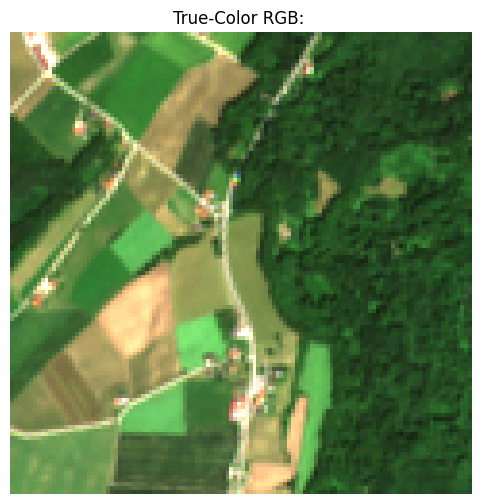

Image shape: (10, 120, 120)
[1.2700998e-03 9.9744618e-01 6.8755267e-05 1.8122697e-03 1.3542093e-03
 1.5639737e-02 5.6029751e-04 4.8791831e-03 1.1580725e-03 3.6267578e-04
 3.2077865e-03 6.1044510e-04 2.8392719e-04 7.7507045e-04 3.0174138e-04
 1.8373642e-02 1.5655167e-02 1.6977239e-02 1.7704262e-03]
['Arable land']
/home/shavak_new/victor/mp2/temp/BigEarthNet-S2/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_55/


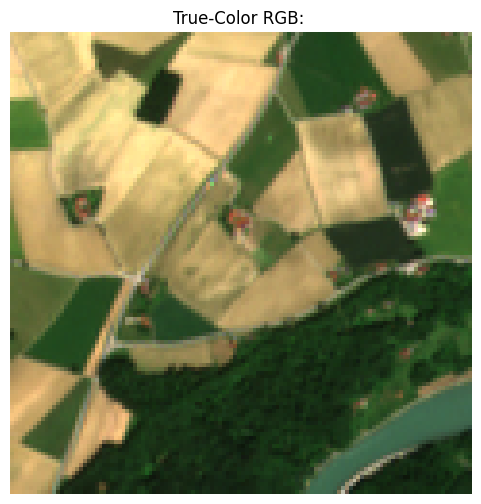

Image shape: (10, 120, 120)
[8.4022954e-03 9.9794751e-01 3.2062064e-05 3.4713207e-03 9.7699149e-04
 2.1570090e-02 5.5538490e-04 1.0053398e-02 1.9807855e-03 1.4958986e-04
 3.8352900e-03 8.0814520e-05 1.2245848e-04 2.9648945e-04 2.8240460e-04
 1.1858612e-02 5.8574808e-01 1.2922602e-02 3.2287396e-03]
['Arable land', 'Permanent crops']


In [ ]:
model = BigEarthNetv2_0_ImageClassifier.from_pretrained(
  "BIFOLD-BigEarthNetv2-0/resnet101-s2-v0.1.1")
# summary(model, input_size=(10, 7, 7))

model.eval()
device = "cuda" if torch.cuda.is_available() else "cpu"

model = model.to(device)

top_dir = HOME_DIR+"/temp/BigEarthNet-S2/"
count = 0

for index, row in full_df.iterrows():
    if count == 2:
        break
        
    # if index < 90000:
    #     continue
    patch_dir = top_dir+row["patch_id"][:-6]+'/'+row["patch_id"]+'/'
    # print(row["encoded"])
    if os.path.isdir(patch_dir):  # ensure it's a folder
        print(patch_dir)
    else:
        continue
        
    show_true_color(patch_dir)
    band_order = ["B02","B03","B04","B05","B06","B07","B08","B8A","B11","B12"]
    bands = []
    
    # --- use B02 as spatial reference (10 m) ---
    ref_band_path = os.path.join(patch_dir, f"{os.path.basename(row['patch_id'])}_B02.tif")
    with rasterio.open(ref_band_path) as ref:
        ref_profile = ref.profile
        ref_height, ref_width = ref.shape
    
    for band in band_order:
        path = os.path.join(patch_dir, f"{os.path.basename(row['patch_id'])}_{band}.tif")
        with rasterio.open(path) as src:
            # read and resample to match the 10 m reference size
            arr = src.read(
                out_shape=(1, ref_height, ref_width),
                resampling=Resampling.bilinear
            )[0].astype(np.float32)
            arr = np.nan_to_num(arr)
            arr /= np.max(arr) if np.max(arr) > 0 else 1.0
            bands.append(arr)
    
    # stack to (10, H, W)
    img = np.stack(bands)
    
    x = torch.tensor(img).unsqueeze(0)  # (1, 10, H, W)
    # x = torch.nn.functional.interpolate(x, size=(224, 224), mode="bilinear", align_corners=False)
    print("Image shape:", img.shape)
    x = x.to(device)
    
    with torch.no_grad():
        outputs = model(x)
        logits = outputs.logits if hasattr(outputs, "logits") else outputs
        probs = torch.sigmoid(logits).cpu().numpy()[0]
    
    
    print(probs)

    predicted_labels = [label_names[i] for i, p in enumerate(probs) if p > 0.15]
    print(predicted_labels)
    count += 1

In [ ]:
# ============================================================
# 1. Dataset definition with safe folder and band checks
# ============================================================

class BigEarthNetCustomDataset(Dataset):
    def __init__(self, df, root_dir, transform=None):
        """
        Args:
            df: Pandas DataFrame with 'patch_id' and 'encoded' columns
            root_dir: path to BigEarthNet-S2 root
            transform: optional transforms for torch tensors
        """
        self.df = df
        self.root_dir = root_dir
        self.transform = transform
        self.band_order = [
            "B02", "B03", "B04", "B05", "B06",
            "B07", "B08", "B8A", "B11", "B12"
        ]

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        patch_dir = os.path.join(self.root_dir, row["patch_id"][:-6], row["patch_id"])

        try:
            # --- check patch folder ---
            if not os.path.isdir(patch_dir):
                raise FileNotFoundError(f"Missing folder: {patch_dir}")

            # --- reference band (B02) ---
            ref_band_path = os.path.join(patch_dir, f"{row['patch_id']}_B02.tif")
            if not os.path.exists(ref_band_path):
                raise FileNotFoundError(f"Missing reference band: {ref_band_path}")

            with rasterio.open(ref_band_path) as ref:
                ref_height, ref_width = ref.shape

            # --- read and normalize all bands ---
            bands = []
            for band in self.band_order:
                path = os.path.join(patch_dir, f"{row['patch_id']}_{band}.tif")
                if not os.path.exists(path):
                    raise FileNotFoundError(f"Missing band: {path}")

                with rasterio.open(path) as src:
                    arr = src.read(
                        out_shape=(1, ref_height, ref_width),
                        resampling=Resampling.bilinear
                    )[0].astype(np.float32)
                    arr = np.nan_to_num(arr)
                    arr /= np.max(arr) if np.max(arr) > 0 else 1.0
                    bands.append(arr)

            img = np.stack(bands, axis=0)  # shape: (10, H, W)
            img = torch.tensor(img, dtype=torch.float32)

            img = F.interpolate(img.unsqueeze(0), size=(224, 224), mode="bilinear", align_corners=False).squeeze(0)
            label = torch.tensor(row["encoded"], dtype=torch.float32)

            if self.transform:
                img = self.transform(img)

            return img, label

        except Exception as e:
            print(f"⚠️ Skipping {row['patch_id']}: {e}")
            return None


# ============================================================
# 2. Collate function (skips None safely)
# ============================================================

def safe_collate_fn(batch):
    """Skips None samples (missing or broken patches)."""
    batch = [b for b in batch if b is not None]
    if len(batch) == 0:
        return None
    return torch.utils.data.default_collate(batch)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
def enforce_label_coverage(train_df, val_df, test_df, full_df, label_names):
    """
    Ensure each split has at least ceil(split_size / num_labels) samples per label.
    If not, fetch extra samples from full_df that are not already in train/val/test
    and add them to the split.
    """
    num_labels = len(label_names)

    def top_up_split(split_df, split_name, all_used_ids):
        split_size = len(split_df)
        threshold = math.ceil(split_size / num_labels)

        print(f"{split_name} threshold per label: {threshold}")

        encoded_matrix = np.vstack(split_df["encoded"].values)
        label_counts = encoded_matrix.sum(axis=0)

        for i, count in enumerate(label_counts):
            if count < threshold:
                needed = threshold - int(count)
                label = label_names[i]

                # Find candidates in full dataset that contain this label
                mask = np.array([row[i] == 1 for row in full_df["encoded"].values])
                candidates = full_df[mask]

                # Exclude samples already present in ANY split
                candidates = candidates[~candidates["patch_id"].isin(all_used_ids)]

                if len(candidates) == 0:
                    print(f"⚠️ No available candidates for label '{label}' in {split_name}")
                    continue

                # Sample extra rows
                extra = candidates.sample(n=min(needed, len(candidates)), random_state=42)
                split_df = pd.concat([split_df, extra], ignore_index=True)

                # Update global used IDs so no overlap across splits
                all_used_ids.update(extra["patch_id"])

                print(f"Added {len(extra)} samples of label '{label}' to {split_name}")

        return split_df, all_used_ids

    # Track all used IDs across splits
    all_used_ids = set(train_df["patch_id"]) | set(val_df["patch_id"]) | set(test_df["patch_id"])

    train_df, all_used_ids = top_up_split(train_df, "Train", all_used_ids)
    val_df,   all_used_ids = top_up_split(val_df, "Validation", all_used_ids)
    test_df,  all_used_ids = top_up_split(test_df, "Test", all_used_ids)

    return train_df, val_df, test_df


In [ ]:
# ============================================================
# 3. Build ResNet-152 model for 10-band input, 19 classes
# ============================================================
BATCH_SIZE = 64
num_epochs = 300
root_dir = HOME_DIR+"/temp/BigEarthNet-S2"

def build_swin(num_classes=19, in_channels=10, pretrained=True):
    model = timm.create_model(
        "swin_small_patch4_window7_224",
        pretrained=pretrained,
        in_chans=in_channels,
        num_classes=num_classes
    )
    return model

# ============================================================
# 4. Load and split dataset
# ============================================================
df_loaded = full_df.sample(n=100000, random_state=42)
X = df_loaded["patch_id"].values
y = np.vstack(df_loaded["encoded"].values)

# First split: Train+Val vs Test (15% test)
msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
train_val_idx, test_idx = next(msss.split(X, y))
train_val = df_loaded.iloc[train_val_idx]
test_df   = df_loaded.iloc[test_idx]

# Second split: Train vs Val (15% of train_val → ~15% overall)
msss_val = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.15/0.85, random_state=42)
train_idx, val_idx = next(msss_val.split(train_val["patch_id"].values, np.vstack(train_val["encoded"].values)))
train_df = train_val.iloc[train_idx]
val_df   = train_val.iloc[val_idx]

train_df, val_df, test_df = enforce_label_coverage(train_df, val_df, test_df, full_df, label_names)

total = len(train_df) + len(val_df) + len(test_df)

train_ratio = len(train_df) / total
val_ratio   = len(val_df) / total
test_ratio  = len(test_df) / total

print(f"Train size: {len(train_df)} ({train_ratio:.2%}); "
      f"Val size: {len(val_df)} ({val_ratio:.2%}); "
      f"Test size: {len(test_df)} ({test_ratio:.2%}); "
      f"Total: {total}")


train_transform = T.Compose([
    T.RandomHorizontalFlip(),
    T.RandomVerticalFlip(),
    T.RandomRotation(10),
])

train_dataset = BigEarthNetCustomDataset(train_df, root_dir, transform=train_transform)
val_dataset   = BigEarthNetCustomDataset(val_df, root_dir, )
test_dataset  = BigEarthNetCustomDataset(test_df, root_dir, )

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, collate_fn=safe_collate_fn)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, collate_fn=safe_collate_fn)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, collate_fn=safe_collate_fn)

# ============================================================
# 5. Setup model, optimizer, scheduler
# ============================================================

X = train_df["patch_id"].values
y = np.vstack(train_df["encoded"].values)

# Compute pos_weight for each of the 19 labels
label_counts = y.sum(axis=0)
neg_counts = len(y) - label_counts

# Avoid division by zero
pos_weights = np.where(label_counts == 0, 1.0, neg_counts / label_counts)
pos_weights = np.clip(pos_weights, 1.0, 20.0) 

print("pos_weights:", pos_weights)
pos_weights_tensor = torch.tensor(pos_weights, dtype=torch.float32).to(device)

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device: ", device)

model = build_swin().to(device)
print("Model loaded")
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weights_tensor) # Multi-label classification
# criterion = nn.BCEWithLogitsLoss() # Multi-label classification
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

Train threshold per label: 3685
Added 1052 samples of label 'Beaches, dunes, sands' to Train
Added 1021 samples of label 'Coastal wetlands' to Train
Added 2081 samples of label 'Industrial or commercial units' to Train
Added 612 samples of label 'Inland wetlands' to Train
Added 1703 samples of label 'Moors, heathland and sclerophyllous vegetation' to Train
Added 1910 samples of label 'Natural grassland and sparsely vegetated areas' to Train
Validation threshold per label: 789
⚠️ No available candidates for label 'Beaches, dunes, sands' in Validation
⚠️ No available candidates for label 'Coastal wetlands' in Validation
Added 445 samples of label 'Industrial or commercial units' to Validation
Added 131 samples of label 'Inland wetlands' to Validation
Added 364 samples of label 'Moors, heathland and sclerophyllous vegetation' to Validation
Added 409 samples of label 'Natural grassland and sparsely vegetated areas' to Validation
Test threshold per label: 790
⚠️ No available candidates for 

In [ ]:
def print_label_distribution(train_df, val_df, test_df, label_names):
    def summarize(split_df, split_name):
        # Stack encoded vectors into a matrix
        encoded_matrix = np.vstack(split_df["encoded"].values)
        # Count occurrences per label
        label_counts = encoded_matrix.sum(axis=0)
        # Build a DataFrame for readability
        dist_df = pd.DataFrame({
            "Label": label_names,
            "Count": label_counts,
            "Percentage": (label_counts / label_counts.sum()) * 100
        })
        print(f"\n{split_name} distribution:")
        print(dist_df.to_string(index=False))

    summarize(train_df, "Train")
    summarize(val_df, "Validation")
    summarize(test_df, "Test")

# Usage:
print_label_distribution(train_df, val_df, test_df, label_names)



Train distribution:
                                                                                 Label  Count  Percentage
                                                                   Agro-forestry areas   5194    2.172794
                                                                           Arable land  30094   12.589156
                                                                 Beaches, dunes, sands   1236    0.517053
                                                                   Broad-leaved forest  22481    9.404427
                                                                      Coastal wetlands   1311    0.548428
                                                          Complex cultivation patterns  16192    6.773563
                                                                     Coniferous forest  24606   10.293373
                                                        Industrial or commercial units   3864    1.616419
                         

In [ ]:
# folder_count = 0

# top_dir = HOME_DIR+"/temp/BigEarthNet-S2/"
# for index, row in df.iterrows():
#     folder_count += 1
#     # if index < 90000:
#     #     continue
#     patch_dir = top_dir+row["patch_id"][:-6]+'/'+row["patch_id"]+'/'
#     # print(patch_dir)
#     if not os.path.isdir(patch_dir):  # ensure it's a folder
#         break

# print("Folder Count:", folder_count)

In [ ]:
# ============================================================
# 6. Training and evaluation functions
# ============================================================

def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    for batch in tqdm(dataloader, desc="Training", leave=False):
        if batch is None:
            continue
        imgs, labels = batch
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * imgs.size(0)

    return running_loss / len(dataloader.dataset)

def evaluate_model(model, dataloader, criterion, device, thresholds=0.2):
    model.eval()
    total_loss = 0.0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating", leave=False):
            if batch is None:
                continue
            imgs, labels = batch
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * imgs.size(0)

            preds = torch.sigmoid(outputs)
            all_preds.append(preds.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    # Stack all predictions and ground truth
    y_true = np.vstack(all_labels)
    y_pred = np.vstack(all_preds)
    
    y_pred_bin = (y_pred >= thresholds).astype(int)

    # --- Classic multi-label metrics ---
    f1_micro = f1_score(y_true, y_pred_bin, average="micro", zero_division=0)
    f1_macro = f1_score(y_true, y_pred_bin, average="macro", zero_division=0)
    precision_micro = precision_score(y_true, y_pred_bin, average="micro", zero_division=0)
    recall_micro = recall_score(y_true, y_pred_bin, average="micro", zero_division=0)

    # --- Average Precision metrics ---
    try:
        ap_micro = average_precision_score(y_true, y_pred, average="micro")
        ap_macro = average_precision_score(y_true, y_pred, average="macro")
    except ValueError:
        ap_micro, ap_macro = np.nan, np.nan

    return (
        total_loss / len(dataloader.dataset),  # average loss
        f1_micro, f1_macro,
        precision_micro, recall_micro,
        ap_micro, ap_macro,
        y_true, y_pred,
    )

def compute_auroc(y_true, y_pred):
    """Compute per-class and mean AUROC safely."""
    n_classes = y_true.shape[1]
    auroc_per_class = []

    for i in range(n_classes):
        try:
            score = roc_auc_score(y_true[:, i], y_pred[:, i])
        except ValueError:
            score = np.nan  # occurs if only one class (all 0s or all 1s)
        auroc_per_class.append(score)

    mean_auroc = np.nanmean(auroc_per_class)
    return mean_auroc, auroc_per_class

def plot_confusion_per_class(y_true, y_pred_bin, label_names):
    """
    Plot a separate confusion matrix for each class (multi-label setup).
    """
    n_classes = len(label_names)

    for i, label in enumerate(label_names):
        cm = confusion_matrix(y_true[:, i], y_pred_bin[:, i])

        # handle single-class case gracefully
        if cm.shape == (1, 1):
            cm = np.array([[cm[0, 0], 0], [0, 0]])

        plt.figure(figsize=(4, 4))
        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=False,
            square=True,
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1']
        )
        plt.title(f"Confusion Matrix — {label}", fontsize=12, fontweight='bold')
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.tight_layout()
        plt.show()
        
def compute_per_class_metrics(y_true, y_pred_bin, label_names, max_label_len=12):
    """
    Compute precision, recall, F1, and accuracy per class.
    Long labels are truncated with ellipsis for readability.
    """
    rows = []
    for i, label in enumerate(label_names):
        y_true_i = y_true[:, i]
        y_pred_i = y_pred_bin[:, i]

        prec = precision_score(y_true_i, y_pred_i, zero_division=0)
        rec = recall_score(y_true_i, y_pred_i, zero_division=0)
        f1 = f1_score(y_true_i, y_pred_i, zero_division=0)
        acc = accuracy_score(y_true_i, y_pred_i)

        # truncate long labels
        short_label = (label[:max_label_len] + "…") if len(label) > max_label_len else label

        rows.append({
            "Class": short_label,
            "Precision": prec,
            "Recall": rec,
            "F1": f1,
            "Accuracy": acc
        })

    df = pd.DataFrame(rows)
    return df


In [ ]:
%cd /home/shavak_new/victor/mp2
%rm best_swin.pth

/home/shavak_new/victor/mp2


In [ ]:
# ============================================================
# 7. Main training loop
# ============================================================
warnings.filterwarnings("ignore", message="No positive class found")

best_val_f1 = 0.0

patience = 5
epochs_no_improve = 0

# --- Setup ---
checkpoint_path = HOME_DIR+"/best_swin.pth"
log_dir = HOME_DIR+"/training_logs"
os.makedirs(log_dir, exist_ok=True)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
log_path = os.path.join(log_dir, f"train_log_{timestamp}.json")

start_epoch = 0
history = []

train_losses, val_losses = [], []
val_micro_f1s, val_macro_f1s = [], []

# --- Resume from checkpoint if it exists ---
if os.path.exists(checkpoint_path):
    print(f"🔁 Loading checkpoint from {checkpoint_path}")
    checkpoint = torch.load(checkpoint_path, map_location=device, weights_only=False)
    model.load_state_dict(checkpoint["model_state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
    scheduler.load_state_dict(checkpoint["scheduler_state_dict"])
    best_val_f1 = checkpoint["best_val_f1"]
    start_epoch = checkpoint["epoch"] + 1
    print(f"Resuming from epoch {start_epoch}, best F1: {best_val_f1:.4f}")

# --- Training loop ---
for epoch in range(start_epoch, num_epochs):
    print(f"\n🌍 Epoch {epoch+1}/{num_epochs}")

    start_time = time.time()
    train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, f1_micro, f1_macro, prec_micro, rec_micro, ap_micro, ap_macro, y_true, y_pred = evaluate_model(
    model, val_loader, criterion, device
)

    scheduler.step()
    epoch_time = time.time() - start_time

    # --- Store metrics ---
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    # --- Store metrics ---
    val_micro_f1s.append(f1_micro)
    val_macro_f1s.append(f1_macro)

    print(f"⏱️ Epoch time: {epoch_time:.2f}s")
    print(f"Val Loss: {val_loss:.4f}")
    print(f"F1 (micro): {f1_micro:.4f} | F1 (macro): {f1_macro:.4f}")
    print(f"Precision (micro): {prec_micro:.4f} | Recall (micro): {rec_micro:.4f}")
    print(f"AP (micro): {ap_micro:.4f} | AP (macro): {ap_macro:.4f}")

    # --- Save best model based on micro-F1 ---
    if f1_micro > best_val_f1:
        best_val_f1 = f1_micro
        torch.save({
            "epoch": epoch,
            "model_state_dict": model.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "scheduler_state_dict": scheduler.state_dict(),
            "best_val_f1": best_val_f1
        }, checkpoint_path)
        print(f"✅ Saved new best model (Micro-F1={best_val_f1:.4f})")
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        print(f"⚠️ No improvement. Patience counter: {epochs_no_improve}/{patience}")

    if epochs_no_improve >= patience:
        print(f"⏹️ Early stopping triggered at epoch {epoch+1}")
        break

    # --- Log stats for this epoch ---
    epoch_log = {
        "epoch": epoch + 1,
        "train_loss": train_loss,
        "val_loss": val_loss,
        "f1_micro": f1_micro,
        "f1_macro": f1_macro,
        "precision_micro": prec_micro,
        "recall_micro": rec_micro,
        "ap_micro": ap_micro,
        "ap_macro": ap_macro,
        "epoch_time_sec": epoch_time,
        "best_val_f1": best_val_f1
    }
    history.append(epoch_log)

    # Save running logs after each epoch
    with open(log_path, "w") as f:
        json.dump(history, f, indent=4)

print(f"\n📁 Training finished. Logs saved to: {log_path}")
print(f"🏆 Best Val Micro-F1: {best_val_f1:.4f}")


🌍 Epoch 1/300


⏱️ Epoch time: 2357.33s
Val Loss: 0.4068
F1 (micro): 0.5788 | F1 (macro): 0.4940
Precision (micro): 0.4129 | Recall (micro): 0.9675
AP (micro): 0.8053 | AP (macro): 0.7687
✅ Saved new best model (Micro-F1=0.5788)

🌍 Epoch 2/300


⏱️ Epoch time: 1272.05s
Val Loss: 0.3829
F1 (micro): 0.5994 | F1 (macro): 0.5240
Precision (micro): 0.4331 | Recall (micro): 0.9730
AP (micro): 0.8235 | AP (macro): 0.7982
✅ Saved new best model (Micro-F1=0.5994)

🌍 Epoch 3/300


⏱️ Epoch time: 1268.19s
Val Loss: 0.3642
F1 (micro): 0.6208 | F1 (macro): 0.5455
Precision (micro): 0.4565 | Recall (micro): 0.9697
AP (micro): 0.8415 | AP (macro): 0.8187
✅ Saved new best model (Micro-F1=0.6208)

🌍 Epoch 4/300


⏱️ Epoch time: 1269.31s
Val Loss: 0.3570
F1 (micro): 0.6503 | F1 (macro): 0.5739
Precision (micro): 0.4900 | Recall (micro): 0.9665
AP (micro): 0.8523 | AP (macro): 0.8218
✅ Saved new best model (Micro-F1=0.6503)

🌍 Epoch 5/300


⏱️ Epoch time: 1267.78s
Val Loss: 0.3548
F1 (micro): 0.6526 | F1 (macro): 0.5720
Precision (micro): 0.4926 | Recall (micro): 0.9664
AP (micro): 0.8464 | AP (macro): 0.8294
✅ Saved new best model (Micro-F1=0.6526)

🌍 Epoch 6/300


⏱️ Epoch time: 1294.03s
Val Loss: 0.3475
F1 (micro): 0.6531 | F1 (macro): 0.5899
Precision (micro): 0.4926 | Recall (micro): 0.9689
AP (micro): 0.8500 | AP (macro): 0.8382
✅ Saved new best model (Micro-F1=0.6531)

🌍 Epoch 7/300


⏱️ Epoch time: 1250.95s
Val Loss: 0.3503
F1 (micro): 0.6842 | F1 (macro): 0.6127
Precision (micro): 0.5308 | Recall (micro): 0.9625
AP (micro): 0.8632 | AP (macro): 0.8380
✅ Saved new best model (Micro-F1=0.6842)

🌍 Epoch 8/300


⏱️ Epoch time: 1538.68s
Val Loss: 0.3610
F1 (micro): 0.6897 | F1 (macro): 0.6328
Precision (micro): 0.5374 | Recall (micro): 0.9624
AP (micro): 0.8668 | AP (macro): 0.8406
✅ Saved new best model (Micro-F1=0.6897)

🌍 Epoch 9/300


⏱️ Epoch time: 1783.28s
Val Loss: 0.3742
F1 (micro): 0.7018 | F1 (macro): 0.6569
Precision (micro): 0.5533 | Recall (micro): 0.9594
AP (micro): 0.8716 | AP (macro): 0.8486
✅ Saved new best model (Micro-F1=0.7018)

🌍 Epoch 10/300


⏱️ Epoch time: 1321.49s
Val Loss: 0.3713
F1 (micro): 0.7065 | F1 (macro): 0.6639
Precision (micro): 0.5597 | Recall (micro): 0.9576
AP (micro): 0.8701 | AP (macro): 0.8494
✅ Saved new best model (Micro-F1=0.7065)

🌍 Epoch 11/300


⏱️ Epoch time: 1260.77s
Val Loss: 0.3778
F1 (micro): 0.7123 | F1 (macro): 0.6690
Precision (micro): 0.5679 | Recall (micro): 0.9550
AP (micro): 0.8725 | AP (macro): 0.8536
✅ Saved new best model (Micro-F1=0.7123)

🌍 Epoch 12/300


⏱️ Epoch time: 1216.15s
Val Loss: 0.3967
F1 (micro): 0.7217 | F1 (macro): 0.6669
Precision (micro): 0.5821 | Recall (micro): 0.9493
AP (micro): 0.8719 | AP (macro): 0.8510
✅ Saved new best model (Micro-F1=0.7217)

🌍 Epoch 13/300


⏱️ Epoch time: 1247.41s
Val Loss: 0.4158
F1 (micro): 0.7278 | F1 (macro): 0.6830
Precision (micro): 0.5929 | Recall (micro): 0.9423
AP (micro): 0.8690 | AP (macro): 0.8518
✅ Saved new best model (Micro-F1=0.7278)

🌍 Epoch 14/300


⏱️ Epoch time: 1287.55s
Val Loss: 0.4245
F1 (micro): 0.7407 | F1 (macro): 0.6956
Precision (micro): 0.6127 | Recall (micro): 0.9362
AP (micro): 0.8723 | AP (macro): 0.8555
✅ Saved new best model (Micro-F1=0.7407)

🌍 Epoch 15/300


⏱️ Epoch time: 1230.33s
Val Loss: 0.4611
F1 (micro): 0.7440 | F1 (macro): 0.7084
Precision (micro): 0.6193 | Recall (micro): 0.9318
AP (micro): 0.8745 | AP (macro): 0.8553
✅ Saved new best model (Micro-F1=0.7440)

🌍 Epoch 16/300


⏱️ Epoch time: 1280.27s
Val Loss: 0.4588
F1 (micro): 0.7402 | F1 (macro): 0.7006
Precision (micro): 0.6126 | Recall (micro): 0.9350
AP (micro): 0.8704 | AP (macro): 0.8575
⚠️ No improvement. Patience counter: 1/5

🌍 Epoch 17/300


⏱️ Epoch time: 1266.33s
Val Loss: 0.4901
F1 (micro): 0.7525 | F1 (macro): 0.7137
Precision (micro): 0.6358 | Recall (micro): 0.9215
AP (micro): 0.8726 | AP (macro): 0.8546
✅ Saved new best model (Micro-F1=0.7525)

🌍 Epoch 18/300


⏱️ Epoch time: 1253.96s
Val Loss: 0.5077
F1 (micro): 0.7578 | F1 (macro): 0.7193
Precision (micro): 0.6436 | Recall (micro): 0.9214
AP (micro): 0.8759 | AP (macro): 0.8598
✅ Saved new best model (Micro-F1=0.7578)

🌍 Epoch 19/300


⏱️ Epoch time: 1275.01s
Val Loss: 0.5333
F1 (micro): 0.7591 | F1 (macro): 0.7252
Precision (micro): 0.6486 | Recall (micro): 0.9148
AP (micro): 0.8733 | AP (macro): 0.8572
✅ Saved new best model (Micro-F1=0.7591)

🌍 Epoch 20/300


⏱️ Epoch time: 1278.46s
Val Loss: 0.5535
F1 (micro): 0.7662 | F1 (macro): 0.7329
Precision (micro): 0.6619 | Recall (micro): 0.9095
AP (micro): 0.8770 | AP (macro): 0.8577
✅ Saved new best model (Micro-F1=0.7662)

🌍 Epoch 21/300


⏱️ Epoch time: 1244.94s
Val Loss: 0.5707
F1 (micro): 0.7661 | F1 (macro): 0.7298
Precision (micro): 0.6638 | Recall (micro): 0.9057
AP (micro): 0.8735 | AP (macro): 0.8488
⚠️ No improvement. Patience counter: 1/5

🌍 Epoch 22/300


⏱️ Epoch time: 1249.75s
Val Loss: 0.5733
F1 (micro): 0.7673 | F1 (macro): 0.7387
Precision (micro): 0.6665 | Recall (micro): 0.9041
AP (micro): 0.8742 | AP (macro): 0.8596
✅ Saved new best model (Micro-F1=0.7673)

🌍 Epoch 23/300


⏱️ Epoch time: 1242.76s
Val Loss: 0.6158
F1 (micro): 0.7728 | F1 (macro): 0.7300
Precision (micro): 0.6799 | Recall (micro): 0.8952
AP (micro): 0.8747 | AP (macro): 0.8474
✅ Saved new best model (Micro-F1=0.7728)

🌍 Epoch 24/300


⏱️ Epoch time: 1249.30s
Val Loss: 0.6216
F1 (micro): 0.7718 | F1 (macro): 0.7372
Precision (micro): 0.6774 | Recall (micro): 0.8967
AP (micro): 0.8743 | AP (macro): 0.8555
⚠️ No improvement. Patience counter: 1/5

🌍 Epoch 25/300


⏱️ Epoch time: 1253.43s
Val Loss: 0.6751
F1 (micro): 0.7795 | F1 (macro): 0.7512
Precision (micro): 0.6963 | Recall (micro): 0.8852
AP (micro): 0.8778 | AP (macro): 0.8581
✅ Saved new best model (Micro-F1=0.7795)

🌍 Epoch 26/300


⏱️ Epoch time: 1251.55s
Val Loss: 0.7048
F1 (micro): 0.7809 | F1 (macro): 0.7558
Precision (micro): 0.7030 | Recall (micro): 0.8783
AP (micro): 0.8767 | AP (macro): 0.8598
✅ Saved new best model (Micro-F1=0.7809)

🌍 Epoch 27/300


⏱️ Epoch time: 1258.52s
Val Loss: 0.6945
F1 (micro): 0.7757 | F1 (macro): 0.7375
Precision (micro): 0.6918 | Recall (micro): 0.8827
AP (micro): 0.8729 | AP (macro): 0.8544
⚠️ No improvement. Patience counter: 1/5

🌍 Epoch 28/300


⏱️ Epoch time: 1257.87s
Val Loss: 0.6698
F1 (micro): 0.7754 | F1 (macro): 0.7502
Precision (micro): 0.6925 | Recall (micro): 0.8808
AP (micro): 0.8714 | AP (macro): 0.8564
⚠️ No improvement. Patience counter: 2/5

🌍 Epoch 29/300


⏱️ Epoch time: 1247.22s
Val Loss: 0.7385
F1 (micro): 0.7825 | F1 (macro): 0.7533
Precision (micro): 0.7078 | Recall (micro): 0.8749
AP (micro): 0.8763 | AP (macro): 0.8536
✅ Saved new best model (Micro-F1=0.7825)

🌍 Epoch 30/300


⏱️ Epoch time: 1304.43s
Val Loss: 0.7862
F1 (micro): 0.7828 | F1 (macro): 0.7553
Precision (micro): 0.7118 | Recall (micro): 0.8696
AP (micro): 0.8720 | AP (macro): 0.8536
✅ Saved new best model (Micro-F1=0.7828)

🌍 Epoch 31/300


⏱️ Epoch time: 1244.31s
Val Loss: 0.7933
F1 (micro): 0.7811 | F1 (macro): 0.7570
Precision (micro): 0.7094 | Recall (micro): 0.8688
AP (micro): 0.8760 | AP (macro): 0.8613
⚠️ No improvement. Patience counter: 1/5

🌍 Epoch 32/300


⏱️ Epoch time: 1248.66s
Val Loss: 0.7956
F1 (micro): 0.7815 | F1 (macro): 0.7510
Precision (micro): 0.7105 | Recall (micro): 0.8681
AP (micro): 0.8738 | AP (macro): 0.8586
⚠️ No improvement. Patience counter: 2/5

🌍 Epoch 33/300


⏱️ Epoch time: 1237.64s
Val Loss: 0.8157
F1 (micro): 0.7841 | F1 (macro): 0.7583
Precision (micro): 0.7116 | Recall (micro): 0.8730
AP (micro): 0.8779 | AP (macro): 0.8594
✅ Saved new best model (Micro-F1=0.7841)

🌍 Epoch 34/300


⏱️ Epoch time: 1268.17s
Val Loss: 0.7983
F1 (micro): 0.7819 | F1 (macro): 0.7566
Precision (micro): 0.7147 | Recall (micro): 0.8629
AP (micro): 0.8710 | AP (macro): 0.8555
⚠️ No improvement. Patience counter: 1/5

🌍 Epoch 35/300


⏱️ Epoch time: 1257.63s
Val Loss: 0.8159
F1 (micro): 0.7813 | F1 (macro): 0.7512
Precision (micro): 0.7094 | Recall (micro): 0.8694
AP (micro): 0.8741 | AP (macro): 0.8550
⚠️ No improvement. Patience counter: 2/5

🌍 Epoch 36/300


⏱️ Epoch time: 1248.27s
Val Loss: 0.8254
F1 (micro): 0.7835 | F1 (macro): 0.7574
Precision (micro): 0.7166 | Recall (micro): 0.8642
AP (micro): 0.8737 | AP (macro): 0.8524
⚠️ No improvement. Patience counter: 3/5

🌍 Epoch 37/300


⏱️ Epoch time: 1236.86s
Val Loss: 0.8395
F1 (micro): 0.7830 | F1 (macro): 0.7612
Precision (micro): 0.7140 | Recall (micro): 0.8668
AP (micro): 0.8739 | AP (macro): 0.8531
⚠️ No improvement. Patience counter: 4/5

🌍 Epoch 38/300


⏱️ Epoch time: 1225.57s
Val Loss: 0.8574
F1 (micro): 0.7866 | F1 (macro): 0.7563
Precision (micro): 0.7250 | Recall (micro): 0.8597
AP (micro): 0.8777 | AP (macro): 0.8584
✅ Saved new best model (Micro-F1=0.7866)

🌍 Epoch 39/300


⏱️ Epoch time: 1284.87s
Val Loss: 0.8162
F1 (micro): 0.7861 | F1 (macro): 0.7605
Precision (micro): 0.7221 | Recall (micro): 0.8624
AP (micro): 0.8750 | AP (macro): 0.8546
⚠️ No improvement. Patience counter: 1/5

🌍 Epoch 40/300


⏱️ Epoch time: 1303.08s
Val Loss: 0.8689
F1 (micro): 0.7902 | F1 (macro): 0.7615
Precision (micro): 0.7326 | Recall (micro): 0.8575
AP (micro): 0.8780 | AP (macro): 0.8591
✅ Saved new best model (Micro-F1=0.7902)

🌍 Epoch 41/300


⏱️ Epoch time: 1243.84s
Val Loss: 0.9236
F1 (micro): 0.7891 | F1 (macro): 0.7610
Precision (micro): 0.7299 | Recall (micro): 0.8588
AP (micro): 0.8791 | AP (macro): 0.8568
⚠️ No improvement. Patience counter: 1/5

🌍 Epoch 42/300


⏱️ Epoch time: 1231.87s
Val Loss: 0.8974
F1 (micro): 0.7878 | F1 (macro): 0.7643
Precision (micro): 0.7268 | Recall (micro): 0.8600
AP (micro): 0.8766 | AP (macro): 0.8524
⚠️ No improvement. Patience counter: 2/5

🌍 Epoch 43/300


⏱️ Epoch time: 1259.26s
Val Loss: 0.9074
F1 (micro): 0.7867 | F1 (macro): 0.7545
Precision (micro): 0.7268 | Recall (micro): 0.8574
AP (micro): 0.8748 | AP (macro): 0.8526
⚠️ No improvement. Patience counter: 3/5

🌍 Epoch 44/300


⏱️ Epoch time: 1242.51s
Val Loss: 0.9182
F1 (micro): 0.7888 | F1 (macro): 0.7609
Precision (micro): 0.7373 | Recall (micro): 0.8481
AP (micro): 0.8746 | AP (macro): 0.8573
⚠️ No improvement. Patience counter: 4/5

🌍 Epoch 45/300


⏱️ Epoch time: 1234.85s
Val Loss: 0.9434
F1 (micro): 0.7895 | F1 (macro): 0.7663
Precision (micro): 0.7356 | Recall (micro): 0.8518
AP (micro): 0.8748 | AP (macro): 0.8536
⚠️ No improvement. Patience counter: 5/5
⏹️ Early stopping triggered at epoch 45

📁 Training finished. Logs saved to: /home/shavak_new/victor/mp2/training_logs/train_log_20251222_131228.json
🏆 Best Val Micro-F1: 0.7902


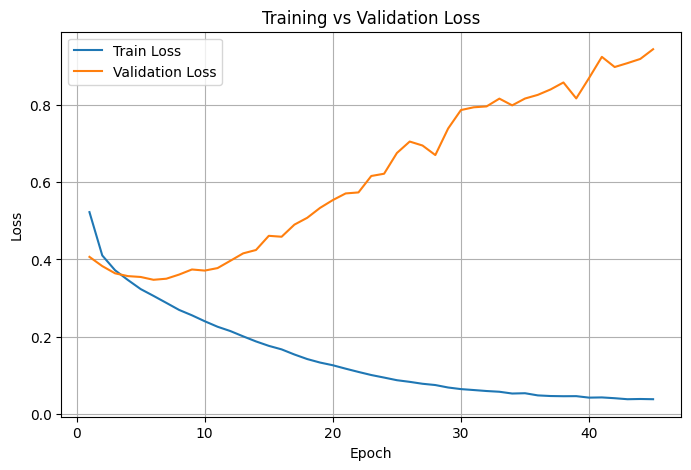

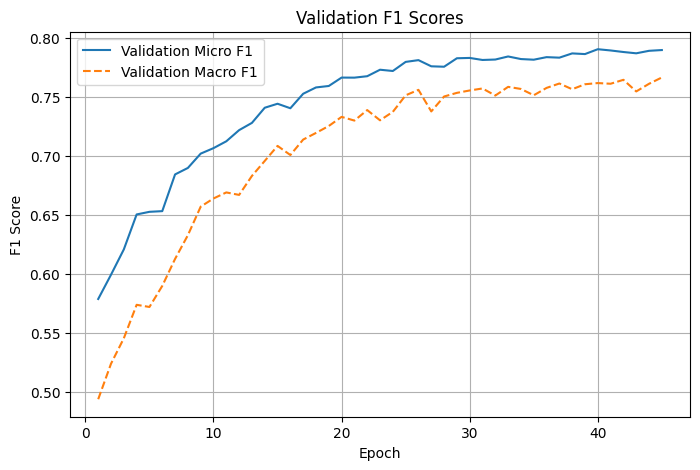

In [ ]:
epochs = range(1, len(train_losses) + 1)

# === Training vs Validation Loss ===
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# === Validation F1 Scores ===
plt.figure(figsize=(8, 5))
plt.plot(epochs, val_micro_f1s, label='Validation Micro F1')
plt.plot(epochs, val_macro_f1s, label='Validation Macro F1', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Validation F1 Scores')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def per_class_thresholds_from_f1(y_true, y_pred, grid=None):
    """
    Compute per-class thresholds by maximizing F1 on a grid of thresholds.
    y_true: [N, C] multi-hot ground truth
    y_pred: [N, C] probabilities (after sigmoid)
    grid: list/array of thresholds to try (default: 0.0 to 1.0 step 0.05)
    """
    if grid is None:
        grid = np.linspace(0.0, 1.0, 21)  # 0.0, 0.05, ..., 1.0

    C = y_true.shape[1]
    thresholds = np.full(C, 0.5, dtype=float)

    for i in range(C):
        best_f1, best_t = 0.0, 0.5
        for t in grid:
            preds = (y_pred[:, i] >= t).astype(int)
            f1 = f1_score(y_true[:, i], preds, zero_division=0)
            if f1 > best_f1:
                best_f1, best_t = f1, t
        thresholds[i] = best_t
    return thresholds

# Example usage
test_thresholds = per_class_thresholds_from_f1(y_true, y_pred)
print(test_thresholds)

[0.8  0.4  0.6  0.5  0.95 0.3  0.2  0.8  0.7  0.85 0.5  0.6  0.5  0.9
 0.85 0.5  0.35 0.1  0.75]


In [ ]:
# ============================================================
# 8. Final test evaluation
# ============================================================

print("\n🧪 Evaluating on Test Set...")

# Load best model safely
checkpoint = torch.load(HOME_DIR+"/best_swin.pth", weights_only=False)
model.load_state_dict(checkpoint["model_state_dict"])
model.to(device)

# Evaluate model on test set
test_loss, f1_micro, f1_macro, prec_micro, rec_micro, ap_micro, ap_macro, y_true, y_pred = evaluate_model(
    model, test_loader, criterion, device, test_thresholds
)

# Compute AUROC (per-class + mean)
mean_auroc, auroc_per_class = compute_auroc(y_true, y_pred)

# ---- Print summary ----
print(f"\n📊 Test Results ({datetime.now().strftime('%Y-%m-%d %H:%M:%S')})")
print(f"Test Loss: {test_loss:.4f}")
print(f"F1 (micro): {f1_micro:.4f} | F1 (macro): {f1_macro:.4f}")
print(f"Precision (micro): {prec_micro:.4f} | Recall (micro): {rec_micro:.4f}")
print(f"AP (micro): {ap_micro:.4f} | AP (macro): {ap_macro:.4f}")
print(f"Mean AUROC: {mean_auroc:.4f}")

# Optional: Print per-class AUROC for debugging / analysis
print("\nPer-Class AUROC:")
for i, score in enumerate(auroc_per_class):
    if not np.isnan(score):
        print(f"{label_names[i]}: {score:.4f}")
    else:
        print(f"{label_names[i]}: NaN")



🧪 Evaluating on Test Set...



📊 Test Results (2025-12-23 05:40:14)
Test Loss: 0.8889
F1 (micro): 0.7954 | F1 (macro): 0.7827
Precision (micro): 0.7657 | Recall (micro): 0.8275
AP (micro): 0.8777 | AP (macro): 0.8608
Mean AUROC: 0.9604

Per-Class AUROC:
Agro-forestry areas: 0.9886
Arable land: 0.9623
Beaches, dunes, sands: 0.9999
Broad-leaved forest: 0.9380
Coastal wetlands: 0.9992
Complex cultivation patterns: 0.9339
Coniferous forest: 0.9688
Industrial or commercial units: 0.9593
Inland waters: 0.9830
Inland wetlands: 0.9670
Land principally occupied by agriculture, with significant areas of natural vegetation: 0.8923
Marine waters: 0.9996
Mixed forest: 0.9441
Moors, heathland and sclerophyllous vegetation: 0.9824
Natural grassland and sparsely vegetated areas: 0.9685
Pastures: 0.9473
Permanent crops: 0.9589
Transitional woodland, shrub: 0.8871
Urban fabric: 0.9683


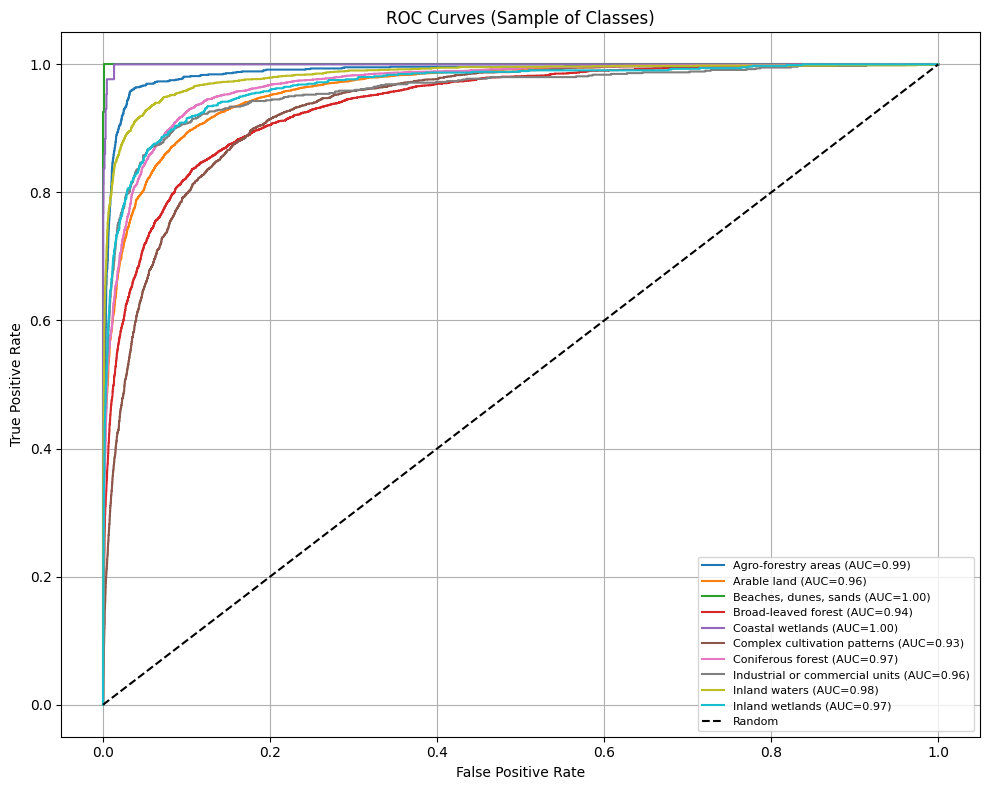

✅ Saved ROC curves in: /home/shavak_new/victor/mp2/roc_curves


In [ ]:
def plot_per_class_roc(y_true, y_pred, label_names, output_dir=HOME_DIR+"/roc_curves", max_classes_to_plot=10):
    os.makedirs(output_dir, exist_ok=True)
    n_classes = y_true.shape[1]

    # Plot selected classes in one figure
    plt.figure(figsize=(10, 8))
    plotted = 0

    for i in range(n_classes):
        try:
            fpr, tpr, _ = roc_curve(y_true[:, i], y_pred[:, i])
            auc_val = roc_auc_score(y_true[:, i], y_pred[:, i])
        except ValueError:
            continue  # Skip classes with no positive labels

        if np.isnan(auc_val):
            continue

        if plotted < max_classes_to_plot:
            plt.plot(fpr, tpr, label=f"{label_names[i]} (AUC={auc_val:.2f})")
            plotted += 1

        # Save each ROC curve individually
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f"AUC = {auc_val:.3f}")
        plt.plot([0, 1], [0, 1], "k--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve — {label_names[i]}")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"roc_{label_names[i].replace(' ', '_')}.png"))
        plt.close()

    # Combined figure for top classes
    plt.plot([0, 1], [0, 1], "k--", label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves (Sample of Classes)")
    plt.legend(fontsize=8)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "roc_combined.png"))
    plt.show()

    print(f"✅ Saved ROC curves in: {output_dir}")
plot_per_class_roc(y_true, y_pred, label_names)


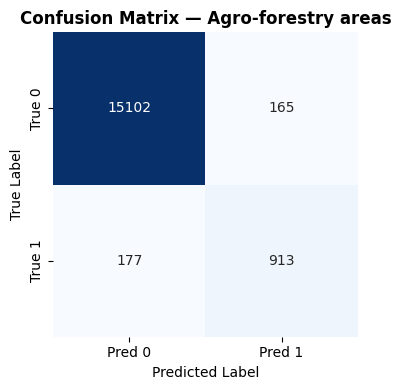

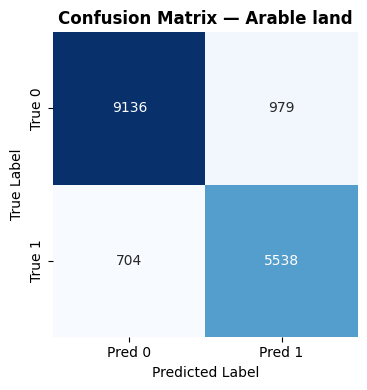

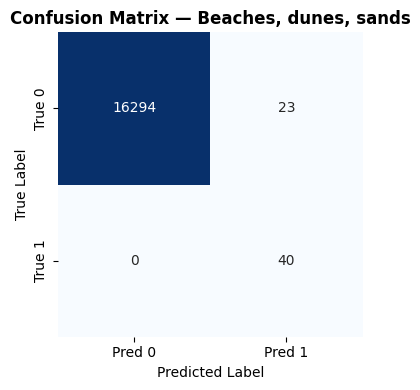

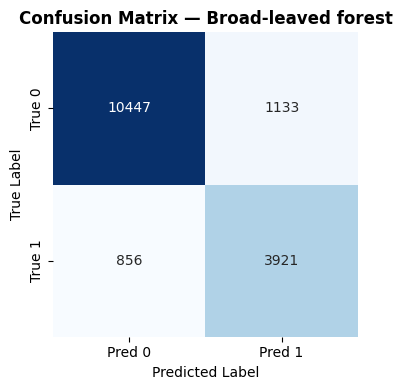

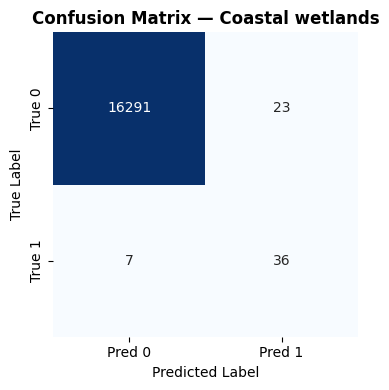

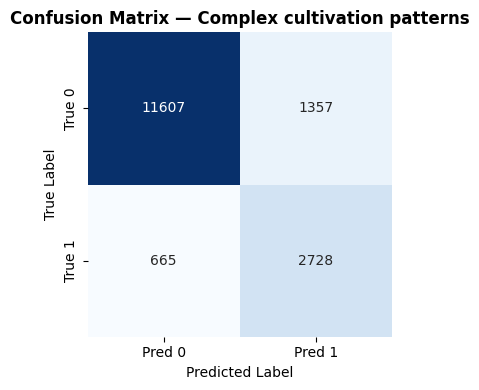

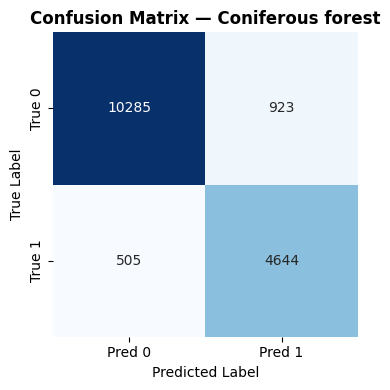

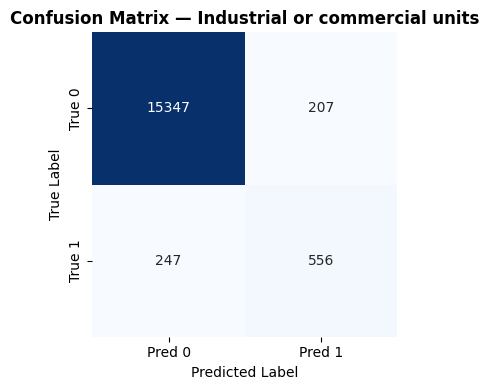

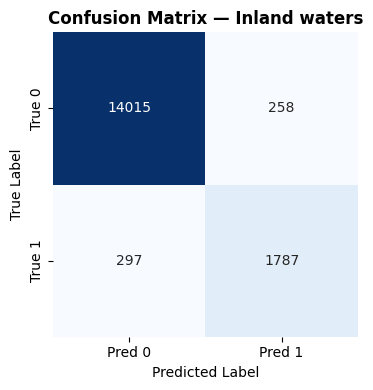

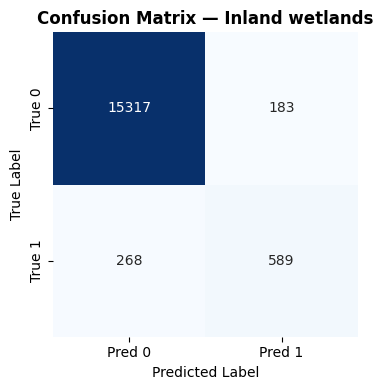

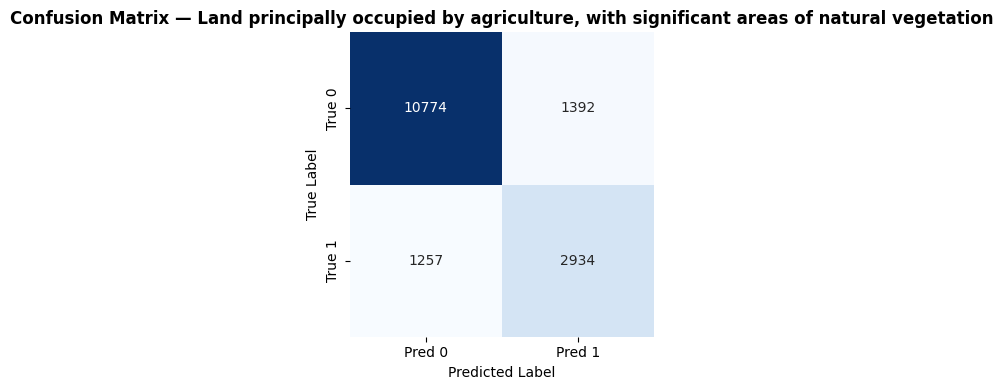

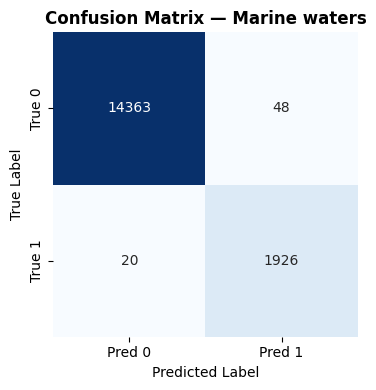

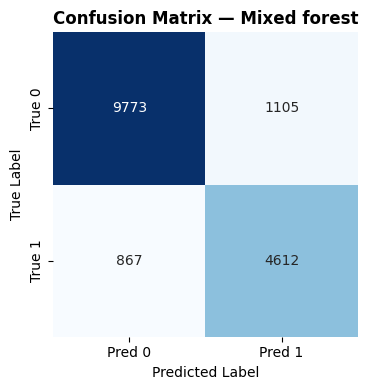

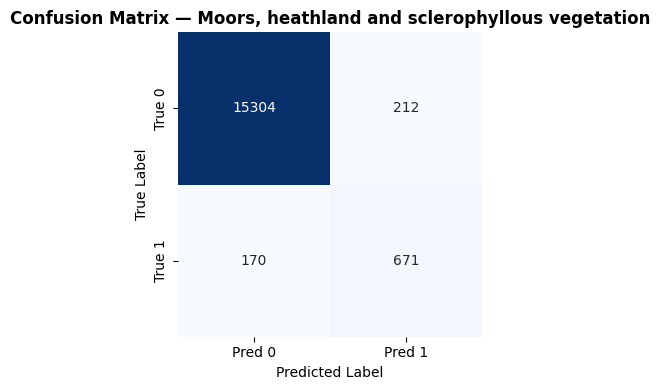

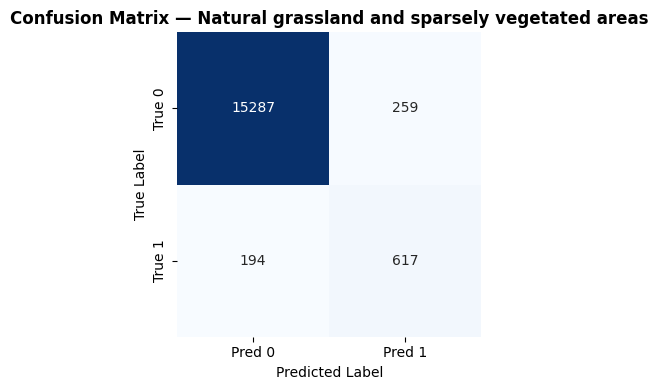

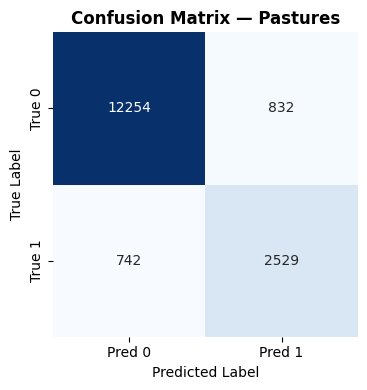

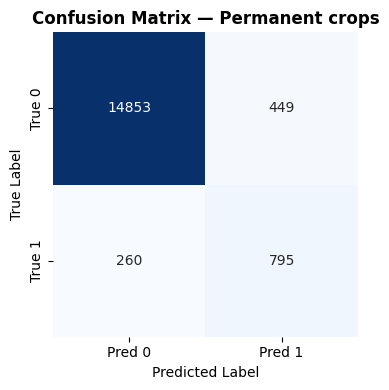

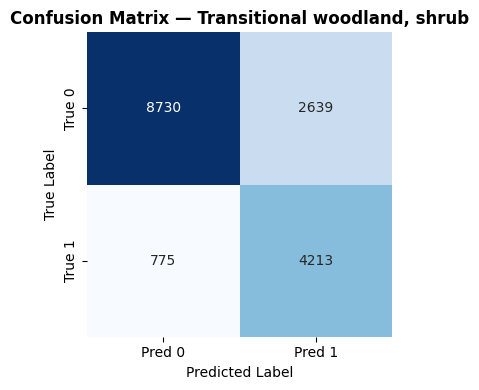

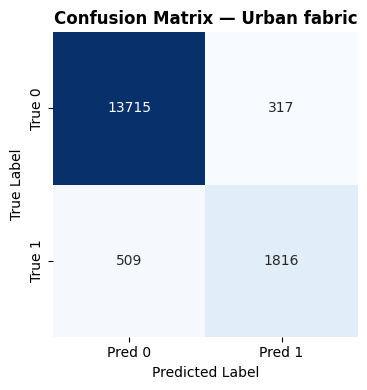

In [ ]:
y_pred_bin = (y_pred >= test_thresholds).astype(int)
plot_confusion_per_class(y_true, y_pred_bin, label_names)

In [ ]:
y_pred_bin = (y_pred >= test_thresholds).astype(int)
metrics_df = compute_per_class_metrics(y_true, y_pred_bin, label_names)

print("\n📊 Per-Class Metrics")
print(metrics_df.to_string(index=False, float_format="%.4f"))


📊 Per-Class Metrics
        Class  Precision  Recall     F1  Accuracy
Agro-forestr…     0.8469  0.8376 0.8423    0.9791
  Arable land     0.8498  0.8872 0.8681    0.8971
Beaches, dun…     0.6349  1.0000 0.7767    0.9986
Broad-leaved…     0.7758  0.8208 0.7977    0.8784
Coastal wetl…     0.6102  0.8372 0.7059    0.9982
Complex cult…     0.6678  0.8040 0.7296    0.8764
Coniferous f…     0.8342  0.9019 0.8667    0.9127
Industrial o…     0.7287  0.6924 0.7101    0.9722
Inland water…     0.8738  0.8575 0.8656    0.9661
Inland wetla…     0.7630  0.6873 0.7231    0.9724
Land princip…     0.6782  0.7001 0.6890    0.8381
Marine water…     0.9757  0.9897 0.9827    0.9958
 Mixed forest     0.8067  0.8418 0.8239    0.8794
Moors, heath…     0.7599  0.7979 0.7784    0.9766
Natural gras…     0.7043  0.7608 0.7315    0.9723
     Pastures     0.7525  0.7732 0.7627    0.9038
Permanent cr…     0.6391  0.7536 0.6916    0.9567
Transitional…     0.6149  0.8446 0.7117    0.7913
 Urban fabric     0.8514  0.7